JAMES PROJECT TWO
Using the dataset attached, answer the following questions;

1.	What is the distribution of age among patients?
2.	How does BMI vary across different age groups?
3.	What is the proportion of males vs. females in the dataset?
4.	How does blood pressure category correlate with BMI?
5.	What percentage of patients have diabetes, and how does it relate to BMI and cholesterol levels?
6.	Is there a relationship between smoking status and blood pressure?
7.	What is the average number of hospital visits per year?
8.	Do patients with hypertension visit hospitals more frequently?
9.	How does medication adherence differ between patients with high and normal cholesterol levels?
10.	How does exercise frequency relate to BMI?
11.	Are smokers more likely to have high blood pressure?
12.	What is the relationship between exercise and hospital visits?
13.	Can we predict diabetes risk based on BMI, blood pressure, and cholesterol levels?
14.	What factors contribute the most to frequent hospital visits?
15.	Are there patterns in age, BMI, and lifestyle habits that indicate health risks?



In [55]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\healthcare_dataset.csv")
df

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Cholesterol_Level,Diabetes,Hospital_Visits_Per_Year,Medication_Adherence,Smoking_Status,Exercise_Frequency
0,P001,69,Male,33.8,Hypertension,Normal,No,0,Poor,Non-Smoker,0
1,P002,32,Female,21.7,Hypertension,Normal,No,0,Good,Smoker,5
2,P003,78,Male,40.0,Hypertension,Low,No,7,Good,Smoker,2
3,P004,38,Male,24.2,Normal,High,No,1,Good,Smoker,6
4,P005,41,Female,39.5,Prehypertension,High,No,11,Good,Smoker,0
...,...,...,...,...,...,...,...,...,...,...,...
95,P096,52,Female,35.0,Normal,High,No,0,Good,Non-Smoker,1
96,P097,82,Female,19.4,Normal,Low,No,4,Good,Non-Smoker,0
97,P098,64,Female,39.9,Hypertension,Normal,No,8,Moderate,Smoker,5
98,P099,20,Male,28.6,Hypertension,Low,No,11,Moderate,Smoker,2


In [91]:
df.groupby('Medication_Adherence').describe()

Age                                                \
                     count       mean        std   min   25%   50%   75%   
Medication_Adherence                                                       
Good                  47.0  48.212766  21.942550  18.0  31.0  47.0  68.0   
Moderate              33.0  52.878788  19.915066  20.0  32.0  56.0  70.0   
Poor                  20.0  53.450000  21.159731  19.0  35.0  60.0  70.5   

                             BMI             ... Hospital_Visits_Per_Year  \
                       max count       mean  ...                      75%   
Medication_Adherence                         ...                            
Good                  82.0  47.0  31.253191  ...                     8.00   
Moderate              79.0  33.0  30.500000  ...                     9.00   
Poor                  80.0  20.0  28.535000  ...                     5.25   

                           Exercise_Frequency                                \
                       max              count     mean       std  min   25%   
Medication_Adherence                                                          
Good                  11.0               47.0  2.87234  2.202933  0.0  1.00   
Moderate              11.0               33.0  3.00000  2.165064  0.0  2.00   
Poor                  10.0               20.0  2.85000  2.084403  0.0  0.75   

                                      
                      50%   75%  max  
Medication_Adherence                  
Good                  2.0  5.00  6.0  
Moderate              3.0  5.00  6.0  
Poor                  3.5  4.25  6.0  

[3 rows x 32 columns]

In [4]:
#checking for null values
df.isnull().sum().sum()

0

What is the distribution of age among patients?

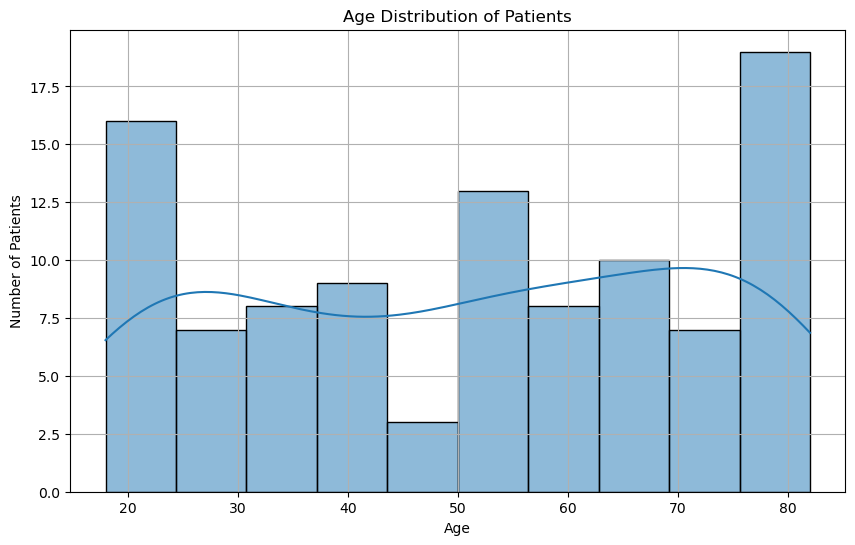

In [7]:
#Visualize Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

How does BMI vary across different age groups?

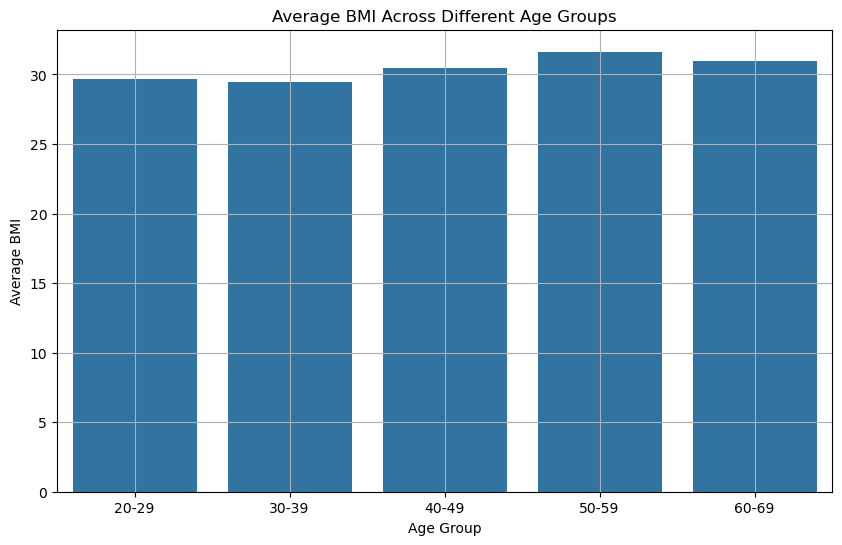

In [8]:
#Creating age groups and calculate average BMI for each group
bins = [20, 30, 40, 50, 60, 70]  #Definining age ranges
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']  # Labels for age ranges

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
average_bmi = df.groupby('age_group')['BMI'].mean().reset_index()

# Visualizing the average BMI across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='BMI', data=average_bmi)
plt.title('Average BMI Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.grid(True)
plt.show()

What is the proportion of males vs. females in the dataset?

Gender Counts:
Gender
Male      52
Female    48
Name: count, dtype: int64

Gender Proportions (%):
Gender
Male      52.0
Female    48.0
Name: count, dtype: float64


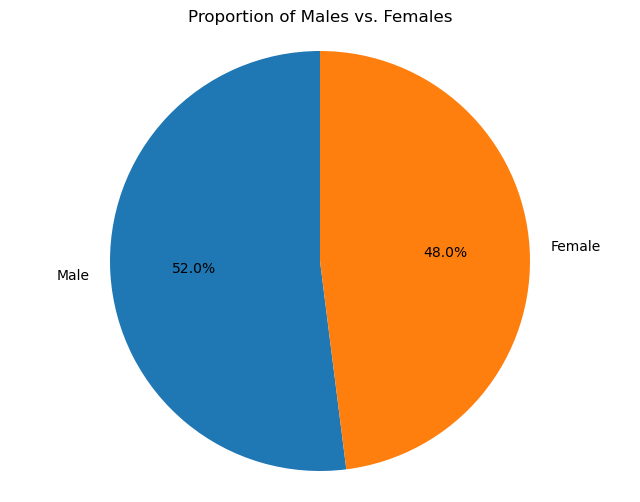

In [116]:
#Calculating gender proportions
gender_counts = df['Gender'].value_counts()
total_patients = gender_counts.sum()
gender_proportions = gender_counts / total_patients * 100  # Converting to percentage
print("Gender Counts:")
print(gender_counts)
print("\nGender Proportions (%):")
print(gender_proportions)

#Visualizing the proportions using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_proportions, labels=gender_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Males vs. Females')
plt.axis('equal')  
plt.show()

How does blood pressure category correlate with BMI?


In [29]:
df.groupby('Blood_Pressure')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Blood_Pressure,,,,,,,,
Hypertension,24.0,30.445833,6.457956,19.2,26.400,29.50,34.950,40.0
Normal,52.0,30.463462,5.784904,19.4,25.400,30.45,35.725,39.9
Prehypertension,24.0,30.470833,6.014221,18.9,26.675,29.60,35.525,39.5


In [25]:
a.index

Index(['Hypertension', 'Normal', 'Prehypertension'], dtype='object', name='Blood_Pressure')

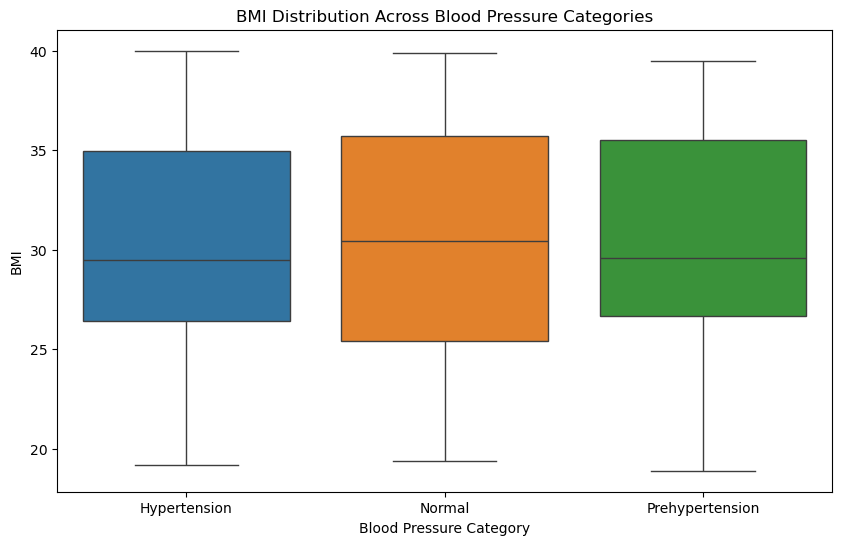

F-statistic: 0.00011309337580705305, P-value: 0.9998869131508473


In [31]:

# Visualizing the correlation using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Blood_Pressure', y='BMI', data=df,hue='Blood_Pressure')
plt.title('BMI Distribution Across Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('BMI')
plt.show()

# Statistical analysis (ANOVA)
from scipy.stats import f_oneway

normal_bmi = df[df['Blood_Pressure'] == 'Normal']['BMI']
prehypertension_bmi = df[df['Blood_Pressure'] == 'Prehypertension']['BMI']
hypertension_bmi = df[df['Blood_Pressure'] == 'Hypertension']['BMI']

# Perform ANOVA
f_statistic, p_value = f_oneway(normal_bmi, prehypertension_bmi, hypertension_bmi)
print(f'F-statistic: {f_statistic}, P-value: {p_value}')

# observation
* blood pressure increases with invrease in body mass index

What percentage of patients have diabetes, and how does it relate to BMI and cholesterol levels?

In [52]:
df.groupby('Diabetes').describe()

Age                                                       BMI  \
         count       mean        std   min   25%   50%   75%   max count   
Diabetes                                                                   
No        83.0  50.493976  21.342374  18.0  31.5  52.0  70.0  82.0  83.0   
yes       17.0  52.294118  20.229201  19.0  45.0  57.0  67.0  79.0  17.0   

                     ... Hospital_Visits_Per_Year       Exercise_Frequency  \
               mean  ...                      75%   max              count   
Diabetes             ...                                                     
No        30.237349  ...                      8.0  11.0               83.0   
yes       31.552941  ...                      9.0  11.0               17.0   

                                                       
              mean       std  min  25%  50%  75%  max  
Diabetes                                               
No        2.915663  2.248061  0.0  1.0  3.0  5.0  6.0  
yes       2.882353  1.615640  0.0  2.0  2.0  4.0  6.0  

[2 rows x 32 columns]

In [125]:
df.groupby('Diabetes')['Diabetes'].count()

Diabetes
No     83
yes    17
Name: Diabetes, dtype: int64

Diabetes
No     83
yes    17
Name: Diabetes, dtype: int64


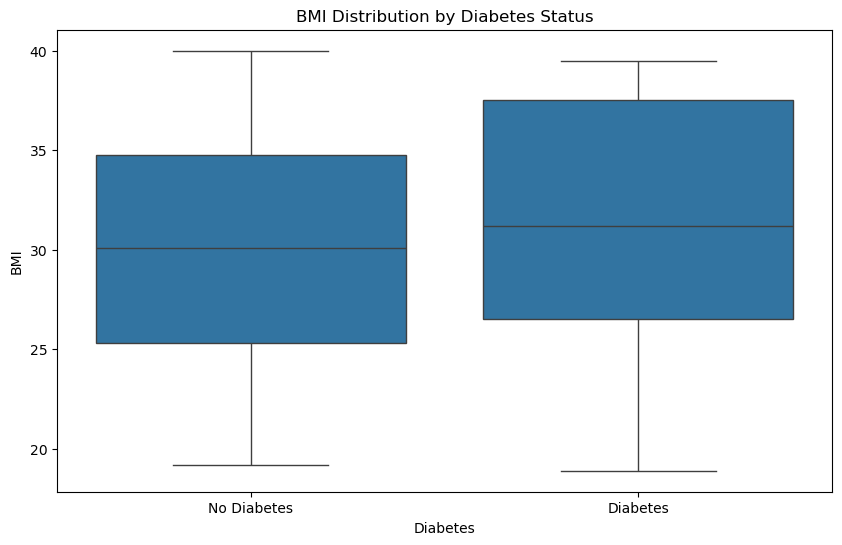

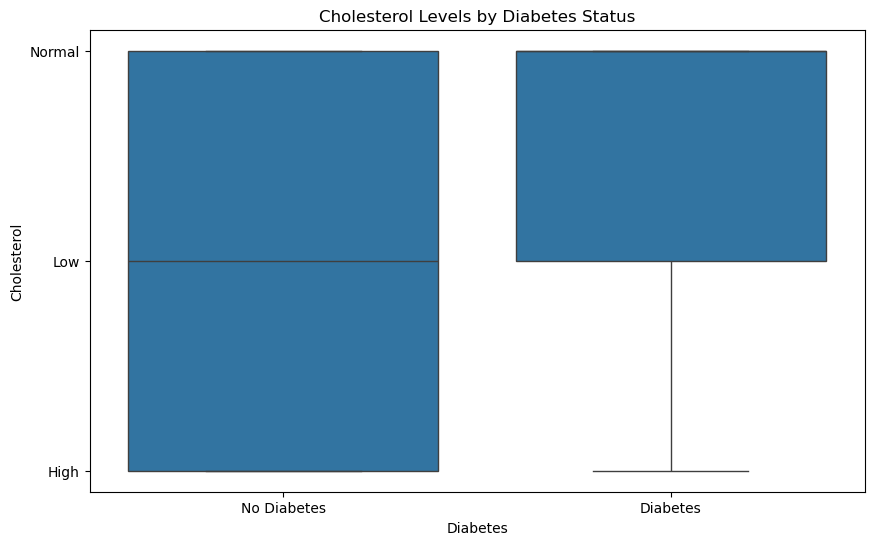

Correlation between Diabetes and BMI: nan
Correlation between Diabetes and Cholesterol: nan


In [74]:
# Calculating percentage of patients with diabetes
diabetes_percentage = df.groupby('Diabetes')['Diabetes'].count() 
print(diabetes_percentage)

# Visualizing the relationship between Diabetes and BMI
plt.figure(figsize=(10,6))
sns.boxplot(x='Diabetes', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Visualizing the relationship between Diabetes and Cholesterol
plt.figure(figsize=(10,6))
sns.boxplot(x='Diabetes', y='Cholesterol_Level', data=df)
plt.title('Cholesterol Levels by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Correlation analysis
correlation_bmi = df.groupby('Diabetes')['Diabetes'].count().corr(df['BMI'])
correlation_cholesterol = df.groupby('Diabetes')['Diabetes'].count().corr(df['Cholesterol_Level'])
print(f'Correlation between Diabetes and BMI: {correlation_bmi:.2f}')
print(f'Correlation between Diabetes and Cholesterol: {correlation_cholesterol:.2f}')

In [60]:
 df.groupby('Diabetes')['Diabetes'].count()

Diabetes
No     83
yes    17
Name: Diabetes, dtype: int64

Is there a relationship between smoking status and blood pressure?

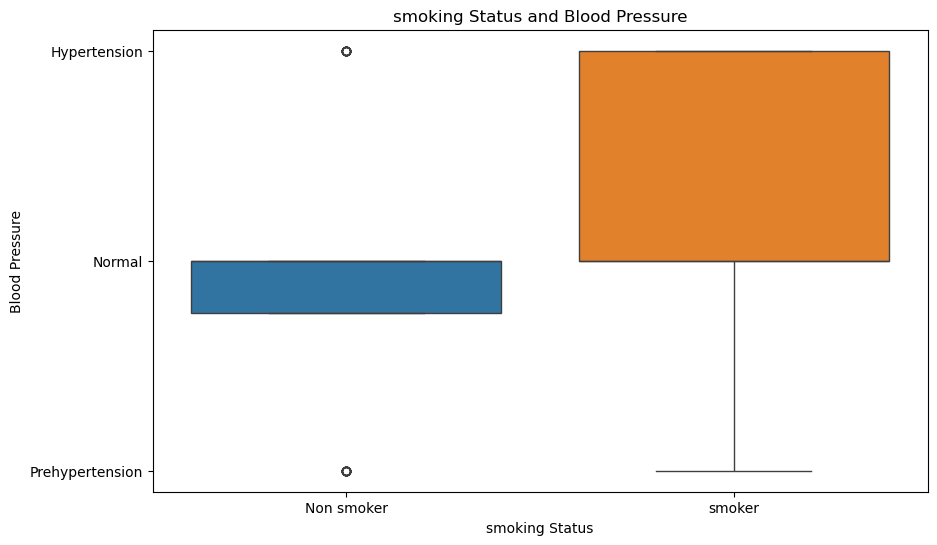

In [77]:
# Visualizing the relationship between Smoking Status and Blood Pressure
plt.figure(figsize=(10,6))
sns.boxplot(x='Smoking_Status', y='Blood_Pressure', data=df,hue='Smoking_Status')
plt.title('smoking Status and Blood Pressure')
plt.xlabel('smoking Status')
plt.ylabel('Blood Pressure')
plt.xticks([0, 1], ['Non smoker', 'smoker'])
plt.show()

## Observation
smokers are more likely to get prehypertension and hypertension while non smokers are not likely to have  blood pressure

What is the average number of hospital visits per year?

In [80]:
df['Hospital_Visits_Per_Year'].count()

100

In [78]:
#checking the mean
df['Hospital_Visits_Per_Year'].mean()

5.18

Do patients with hypertension visit hospitals more frequently?

In [110]:
df.groupby('Blood_Pressure')['Hospital_Visits_Per_Year'].value_counts().unstack()

Hospital_Visits_Per_Year,0,1,2,3,4,5,6,7,8,9,10,11
Blood_Pressure,,,,,,,,,,,,
Hypertension,2.0,2.0,4.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,NaN,4.0
Normal,6.0,9.0,3.0,2.0,6.0,4.0,3.0,3.0,3.0,5.0,6.0,2.0
Prehypertension,1.0,2.0,2.0,2.0,2.0,5.0,NaN,3.0,1.0,1.0,3.0,2.0


Average Hospital Visits by Blood Pressure :
Blood_Pressure
Hypertension       5.333333
Normal             4.903846
Prehypertension    5.625000
Name: Hospital_Visits_Per_Year, dtype: float64


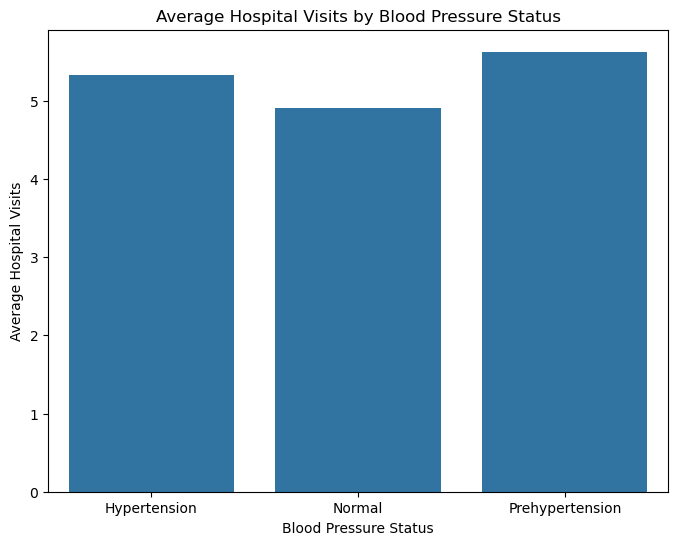

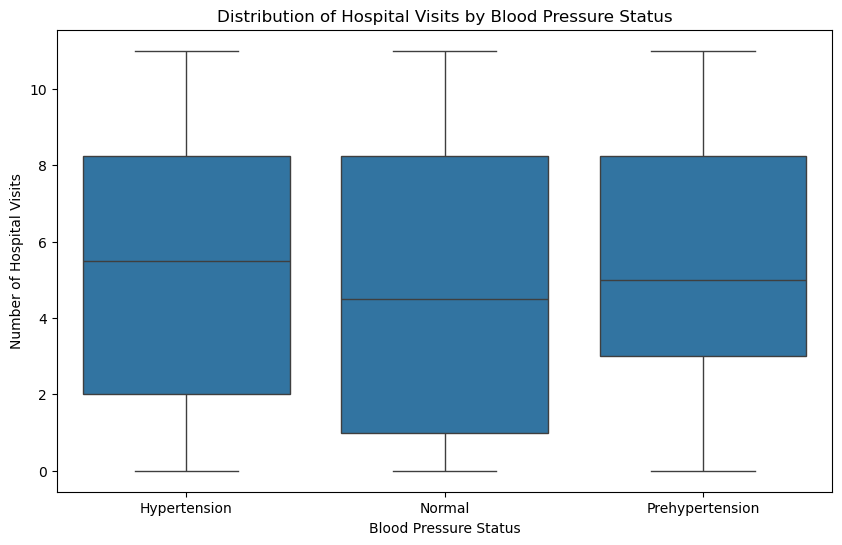

In [126]:
# Calculating average hospital visits by blood pressure status
avg_visits = df.groupby('Blood_Pressure')['Hospital_Visits_Per_Year'].mean()
print(f'Average Hospital Visits by Blood Pressure :\n{avg_visits}')

# Visualizing the average hospital visits by blood pressure status
plt.figure(figsize=(8,6))
sns.barplot(x=avg_visits.index, y=avg_visits.values)
plt.title('Average Hospital Visits by Blood Pressure Status')
plt.xlabel('Blood Pressure Status')
plt.ylabel('Average Hospital Visits')
plt.show()

# Analyzing distribution of hospital visits based on blood pressure status
plt.figure(figsize=(10,6))
sns.boxplot(x='Blood_Pressure', y='Hospital_Visits_Per_Year', data=df)
plt.title('Distribution of Hospital Visits by Blood Pressure Status')
plt.xlabel('Blood Pressure Status')
plt.ylabel('Number of Hospital Visits')
plt.show()

In [112]:
##patients with hypertension frequently visit hospitals compared to normal

How does medication adherence differ between patients with high and normal cholesterol levels?

In [84]:
df.groupby('Cholesterol_Level')['Medication_Adherence'].describe()

,count,unique,top,freq
Cholesterol_Level,,,,
High,25,3,Good,12
Low,25,3,Good,15
Normal,50,3,Good,20


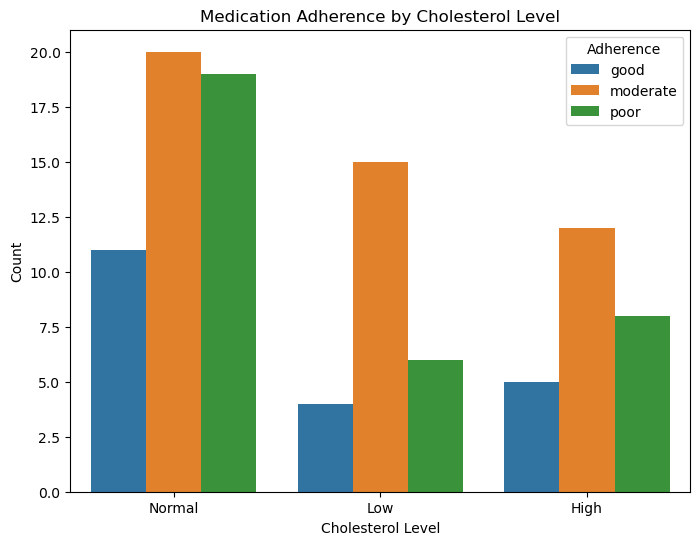

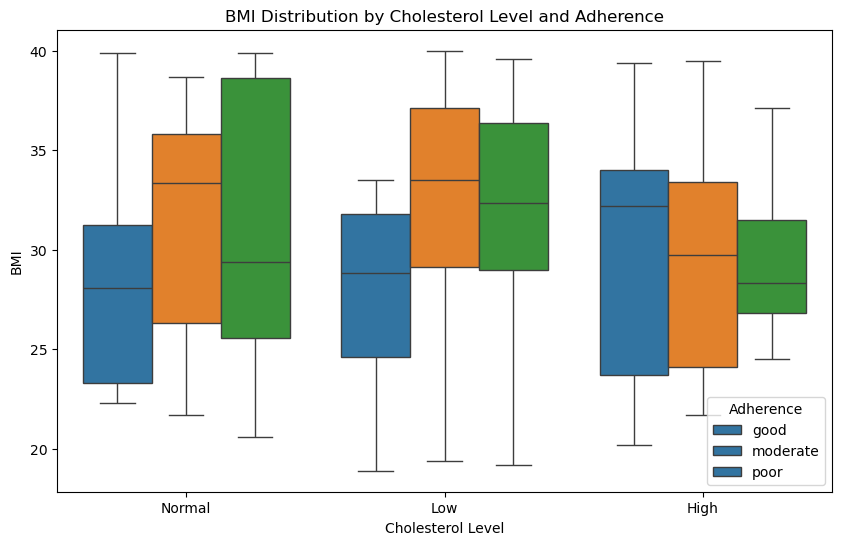

In [93]:
# Visualizing the adherence rates by cholesterol level
plt.figure(figsize=(8,6))
sns.countplot(x='Cholesterol_Level', hue='Medication_Adherence', data=df)
plt.title('Medication Adherence by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.legend(title='Adherence', labels=['good', 'moderate','poor'])
plt.show()

# Analyzing BMI based on adherence and cholesterol levels
plt.figure(figsize=(10,6))
sns.boxplot(x='Cholesterol_Level', y='BMI', hue='Medication_Adherence', data=df)
plt.title('BMI Distribution by Cholesterol Level and Adherence')
plt.xlabel('Cholesterol Level')
plt.ylabel('BMI')
plt.legend(title='Adherence', labels=['good', 'moderate','poor'])
plt.show()

## How does exercise frequency relate to BMI?

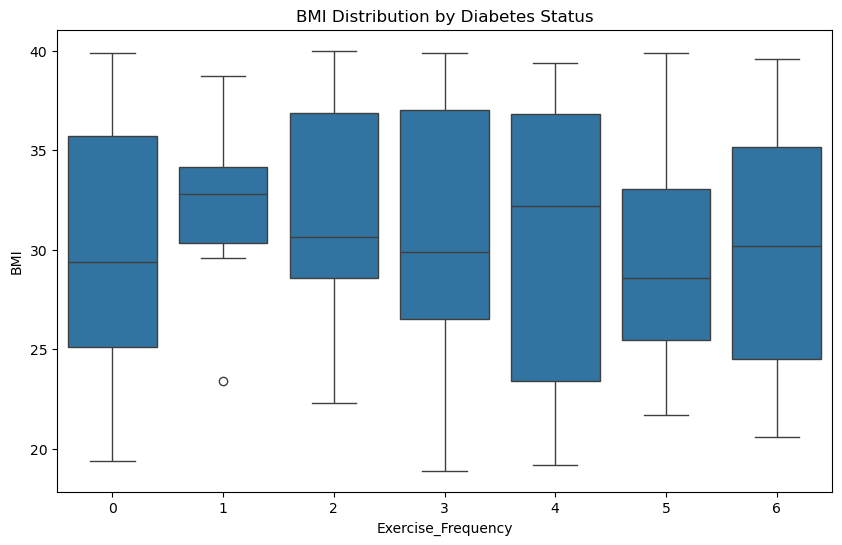

In [96]:
# Visualizing the relationship between exercise frequency and BMI
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Exercise_Frequency', y='BMI', )
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Exercise_Frequency')
plt.ylabel('BMI')
plt.show()


In [97]:
# Correlation analysis
correlation_bmi = df['Exercise_Frequency'].corr(df['BMI'])
print(f'Correlation between Exercise_Frequency and BMI: {correlation_bmi:.2f}')


Correlation between Exercise_Frequency and BMI: -0.08


## observation

* As Exercise_Frequency increases BMI  decreases

## Are smokers more likely to have high blood pressure?

In [106]:
df.groupby('Smoking_Status')['Blood_Pressure'].value_counts(normalize=True).unstack()* 100

Blood_Pressure,Hypertension,Normal,Prehypertension
Smoking_Status,,,
Non-Smoker,19.736842,55.263158,25.000000
Smoker,37.500000,41.666667,20.833333


Prevalence of High Blood Pressure by Smoking Status:
Blood_Pressure  Hypertension     Normal  Prehypertension
Smoking_Status                                          
Non-Smoker         19.736842  55.263158        25.000000
Smoker             37.500000  41.666667        20.833333


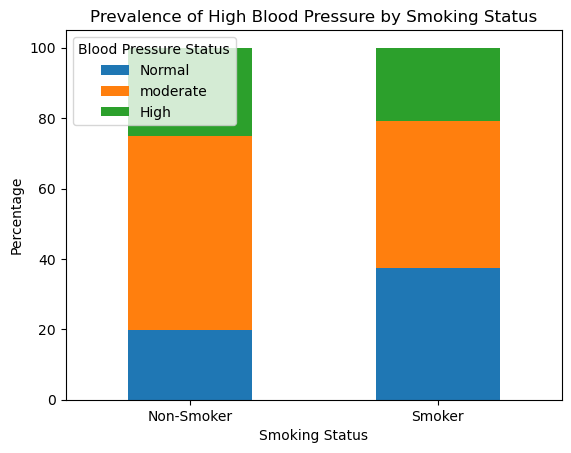

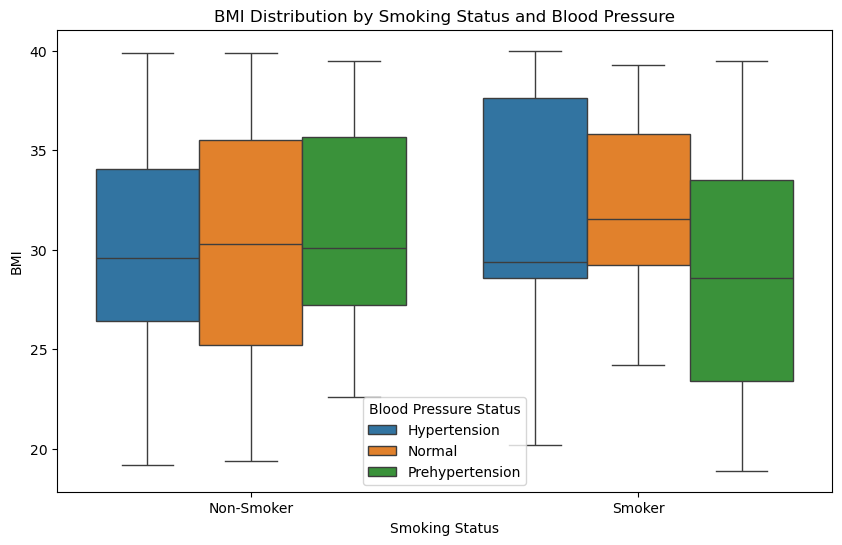

In [124]:
# Calculating prevalence of high blood pressure by smoking status
high_prevalence = df.groupby('Smoking_Status')['Blood_Pressure'].value_counts(normalize=True).unstack() * 100
print(f'Prevalence of High Blood Pressure by Smoking Status:\n{high_prevalence}')

# Visualizing the prevalence of high blood pressure
high_prevalence.plot(kind='bar', stacked=True)
plt.title('Prevalence of High Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Blood Pressure Status', labels=['Normal','moderate', 'High'])
plt.show()

# Analyzing BMI based on smoking status and blood pressure levels
plt.figure(figsize=(10,6))
sns.boxplot(x='Smoking_Status', y='BMI', hue='Blood_Pressure', data=df)
plt.title('BMI Distribution by Smoking Status and Blood Pressure')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.legend(title='Blood Pressure Status')
plt.show()

# observation

* smokers are more likely to have hypertension 

Are there patterns in age, BMI, and lifestyle habits that indicate health risks?

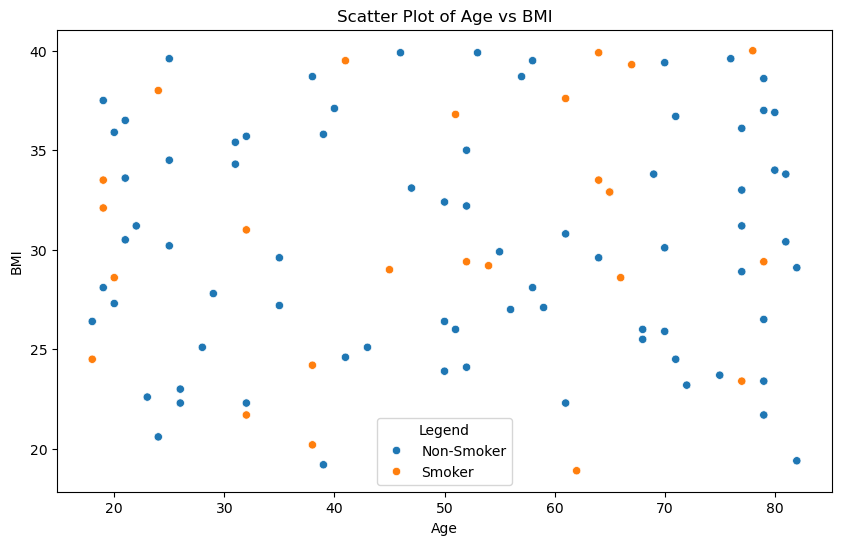

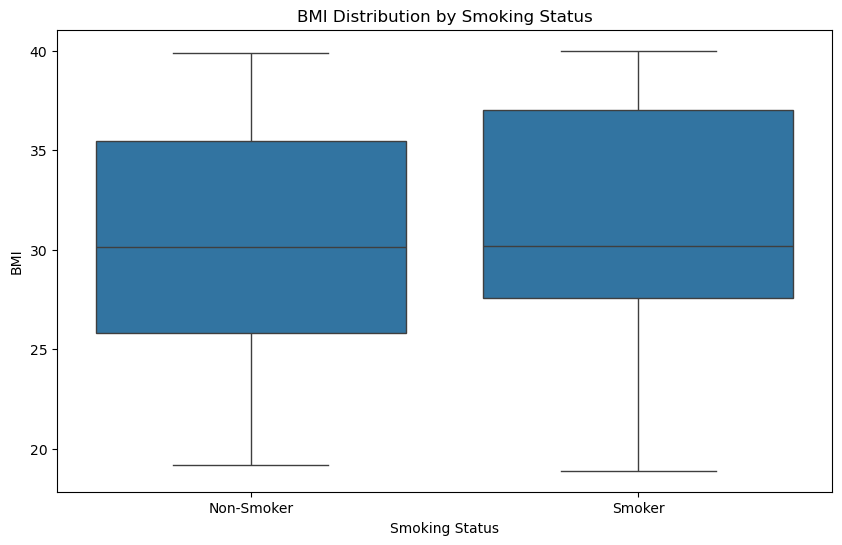

In [114]:
# Visualizing the relationship between Age and BMI
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='BMI', hue='Smoking_Status',  data=df)
plt.title('Scatter Plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Legend')
plt.show()

# Analyzing BMI distribution by Smoking Status
plt.figure(figsize=(10,6))
sns.boxplot(x='Smoking_Status', y='BMI', data=df)
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('BMI')
plt.show()

# observations

* Aged patients with high BMI are more likely to be in health risks
* Smoking patients are also likely tohave health risks
* patients who do not exersise also are more likely to have health risks 

What factors contribute the most to frequent hospital visits?

* Age 
* smoking habit
* body mass index
